In [3]:
import glob
import h5py
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

h5file = h5py.File('fardet_genie_nonswap_genierw_fhc_v08_1000_r00022161_s07_c000_N18-10-09_v1_20170915_165621_sim.h5caf.h5')



#h5file = h5py.File('fardet_genie_fluxswap_genierw_fhc_v08_1000_r00025412_s09_c000_N19-03-11_v1_20170915_165654_sim.h5caf.h5')

def get_maps(h5file):
   
    pm = np.empty((0, 2, 80, 100, 1), dtype=np.uint8)
    lb = np.empty((0), dtype=np.uint8)

    flatmap = h5file.get('rec.training.cvnmaps').get('cvnmap')
    pmaps = np.reshape(flatmap, (-1, 2, 100, 80, 1))
    pmaps = np.transpose(pmaps, (0, 1, 3, 2, 4))
    
    return pmaps    

In [4]:
h5file.get('rec.training.cvnmaps').get('cvnmap')

<HDF5 dataset "cvnmap": shape (67086, 16000), type "|u1">

In [5]:
pmaps0 = get_maps(h5file)

In [77]:
def get_labels(h5file):
        pdgs = h5file.get('rec.mc.nu').get('pdg').value
        iscc = h5file.get('rec.mc.nu').get('iscc').value

        mcrun = h5file.get('rec.mc.nu').get('run').value
        mcsubrun = h5file.get('rec.mc.nu').get('subrun').value
        mcevt = h5file.get('rec.mc.nu').get('evt').value
        mcsubevt = h5file.get('rec.mc.nu').get('subevt').value

        prun = h5file.get('rec.training.cvnmaps').get('run').value
        psubrun = h5file.get('rec.training.cvnmaps').get('subrun').value
        pevt = h5file.get('rec.training.cvnmaps').get('evt').value
        psubevt = h5file.get('rec.training.cvnmaps').get('subevt').value

        mcd = {'run': np.char.mod('%d', mcrun[:, 0]),
               'subrun': np.char.mod('%d', mcsubrun[:, 0]),
               'evt': np.char.mod('%d', mcevt[:, 0]),
               'subevt': np.char.mod('%d', mcsubevt[:, 0]),
               'iscc': iscc[:, 0],
               'pdg': pdgs[:, 0]}

        mcdf = pd.DataFrame(data=mcd)

        pmd = {'run': np.char.mod('%d', prun[:, 0]),
               'subrun': np.char.mod('%d', psubrun[:, 0]),
               'evt': np.char.mod('%d', pevt[:, 0]),
               'subevt': np.char.mod('%d', psubevt[:, 0]),
               'label': np.repeat(2, len(prun[:, 0]))}  #<----

        pmdf = pd.DataFrame(data=pmd)

        zflrun = pmdf.run.map(len).max()
        zflsubrun = pmdf.subrun.map(len).max()
        zflevt = pmdf.evt.map(len).max()
        zflsubevt = pmdf.subevt.map(len).max()

        mcdf['run'] = mcdf['run'].apply(lambda x: x.zfill(zflrun))
        mcdf['subrun'] = mcdf['subrun'].apply(lambda x: x.zfill(zflsubrun))
        mcdf['evt'] = mcdf['evt'].apply(lambda x: x.zfill(zflevt))
        mcdf['subevt'] = mcdf['subevt'].apply(lambda x: x.zfill(zflsubevt))
        mcdf['key'] = mcdf.run + mcdf.subrun + mcdf.evt + mcdf.subevt

        pmdf['run'] = pmdf['run'].apply(lambda x: x.zfill(zflrun))
        pmdf['subrun'] = pmdf['subrun'].apply(lambda x: x.zfill(zflsubrun))
        pmdf['evt'] = pmdf['evt'].apply(lambda x: x.zfill(zflevt))
        pmdf['subevt'] = pmdf['subevt'].apply(lambda x: x.zfill(zflsubevt))
        pmdf['key'] = pmdf.run + pmdf.subrun + pmdf.evt + pmdf.subevt

        nudf = pmdf.loc[pmdf.key.isin(mcdf.key)]
        cosmicdf = pmdf.loc[~pmdf.key.isin(mcdf.key)]

        nudf = pd.merge(nudf, mcdf)

        nudf.loc[abs(nudf.pdg) == 12, 'label'] = 1
        nudf.loc[abs(nudf.pdg) == 14, 'label'] = 0
        #nudf.loc[abs(nudf.pdg) == 16, 'label'] = 4 
        nudf.loc[nudf.iscc == 0, 'label'] = 3

        nudf = nudf.drop(['pdg', 'iscc'], axis=1)  # Drop to concat with cosmics

        # Glue the neutrino and cosmic dfs back together
        df = pd.concat([nudf, cosmicdf])

        df = df.sort_values(['key'], ascending=True)

        return df

In [138]:
#df.to_csv('test.csv', sep=';')

In [78]:
df0 = get_labels(h5file)

In [37]:
#df0

In [79]:
labels0 = list(df0['label'])

In [80]:
indexes = [index for index in range(len(labels0)) if labels0[index] == 3]

In [81]:
df = df0[df0.label != 3]

In [47]:
#x=df0
#new_df = x[~x.ind.isin(indexes)]
#new_df

In [82]:
pmaps=np.delete(pmaps0, indexes, axis = 0)

Výsledný input --> (viewXY,viewYZ)
Výsledné labely --> labels

In [83]:
pmaps.shape

(66939, 2, 80, 100, 1)

In [61]:
df.shape

(66939, 6)

In [84]:
labels=list(df0['label'])

In [85]:
viewXY=pmaps[:,0]
viewYZ=pmaps[:,1]
labels=df['label']

In [86]:
labels=list(labels)

In [87]:
labels_tr=list( labels[i] for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,348,415,541,688,887,962,1019,1073,8534,79,473,7332,8472] )

In [88]:
pmaps.shape

(66939, 2, 80, 100, 1)

In [89]:
indices = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,348,415,541,688,887,962,1019,1073,8534,79,473,7332,8472]

In [90]:
pmaps_tr=pmaps[indices]

In [91]:
pmaps_tr.shape

(39, 2, 80, 100, 1)

In [92]:
import pandas as pd
np.savetxt('labels_tr.csv', labels_tr , delimiter=',', fmt='%s')

# Print Pixelmaps

In [93]:
def print_pixelmap(pmaps,id,view):
        result = (pmaps[id][view])[:, :, 0]
        plt.imshow(result,cmap='Oranges')
        plt.show()
        return 0

In [94]:
len(pmaps_tr)

39

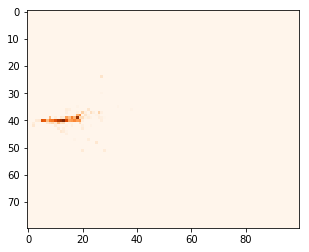

0

In [95]:
print_pixelmap(pmaps_tr,38,0)

# Input and Output Data preparation

Preprocessing of a small set of data for parameter tuning 

In [96]:
from keras.utils import np_utils

ind_tr  = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,28,29,30,31,32,33,34,35,36,37]
ind_ts = [18,19,20,21,22,23,24,25,26,27,38]

In [326]:
XY_train0 = pmaps_tr[ind_tr,0]
YZ_train0 = pmaps_tr[ind_tr,1]

XY_test0 = pmaps_tr[ind_ts,0]
YZ_test0 = pmaps_tr[ind_ts,1]


Y_train0 =list( labels_tr[i] for i in ind_tr )
Y_test0 =list( labels_tr[i] for i in ind_ts )

In [327]:
XY_train = XY_train0.reshape(XY_train0.shape[0], 1, 100, 80).astype('float32')/255
YZ_train = YZ_train0.reshape(YZ_train0.shape[0], 1, 100, 80).astype('float32')/255
Y_train = np_utils.to_categorical(Y_train0,3)
           
XY_test = XY_test0.reshape(XY_test0.shape[0], 1, 100, 80).astype('float32')/255
YZ_test = YZ_test0.reshape(YZ_test0.shape[0], 1, 100, 80).astype('float32')/255
Y_test = np_utils.to_categorical(Y_test0,3)

Now let's prepare the final data set

In [358]:
from sklearn.model_selection import train_test_split

pmaps_train, pmaps_test, y_train, y_test = train_test_split(pmaps, labels, test_size=1/10, random_state=42)

6694

In [346]:
X1_train0 = pmaps_train[:,0]
X2_train0 = pmaps_train[:,1]

X1_test0 = pmaps_test[:,0]
X2_test0 = pmaps_test[:,1]

In [349]:
X1_train = X1_train0.reshape(X1_train0.shape[0], 1, 100, 80).astype('float32')/255
X2_train = X2_train0.reshape(X2_train0.shape[0], 1, 100, 80).astype('float32')/255
y_train = np_utils.to_categorical(y_train,3)
           
X1_test = X1_test0.reshape(X1_test0.shape[0], 1, 100, 80).astype('float32')/255
X2_test = X2_test0.reshape(X2_test0.shape[0], 1, 100, 80).astype('float32')/255
y_test = np_utils.to_categorical(y_test,3)

# Model: Simple CVN by Aris. Tsaris

In [328]:
import os

# Keras utilities
import keras
from keras.models import model_from_json, load_model
from keras.optimizers import SGD

import h5py
import numpy as np

# Local models

from keras.models import Sequential
from keras.models import Model
from keras.layers import Activation,Input,Dense,Dropout,BatchNormalization,Conv2D,MaxPooling2D,MaxPooling3D,AveragePooling2D,concatenate,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D,AveragePooling2D
from keras.regularizers import l2
import numpy as np
seed = 7
np.random.seed(seed)


In [329]:
def Conv2d_All(x, nb_filter,kernel_size, padding='same',strides=(1,1),name=None):
    if name is not None:
        bn_name = name + '_bn'
        conv_name = name + '_conv'
    else:
        bn_name = None
        conv_name = None
        
    x = Conv2D(nb_filter,kernel_size,padding=padding,strides=strides,activation='relu',name=conv_name)(x)
    x = BatchNormalization(axis=3,name=bn_name)(x)
    return x

def Inception(x,nb_filter):
    b1x1 = Conv2d_All(x,nb_filter,(1,1), padding='same',strides=(1,1),name=None)
    b3x3 = Conv2d_All(x,nb_filter,(1,1), padding='same',strides=(1,1),name=None)
    b3x3 = Conv2d_All(b3x3,nb_filter,(3,3), padding='same',strides=(1,1),name=None)
    b5x5 = Conv2d_All(x,nb_filter,(1,1), padding='same',strides=(1,1),name=None)
    b5x5 = Conv2d_All(b5x5,nb_filter,(1,1), padding='same',strides=(1,1),name=None)
    bpool = MaxPooling2D(pool_size=(3,3),strides=(1,1),padding='same')(x)
    bpool = Conv2d_All(bpool,nb_filter,(1,1),padding='same',strides=(1,1),name=None)
    x = concatenate([b1x1,b3x3,b5x5,bpool],axis=3)
    return x

def CVN(num_classes):
    input1 = Input(shape=(1, 100,80), dtype='float32', name='input1')
    input2 = Input(shape=(1, 100,80), dtype='float32', name='input2')

    x1 = Conv2d_All(input1,64,(7,7),strides=(2,2),padding='same')
    x1 = MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same')(x1)
    x1 = Conv2d_All(x1,192,(3,3),strides=(1,1),padding='same')
    x1 = MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same')(x1)
    x1 = Inception(x1,64)
    x1 = Inception(x1,120)
    x1 = MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same')(x1)
    x1 = Inception(x1,128)
    x1 = AveragePooling2D(pool_size=(7,7),strides=(7,7),padding='same')(x1)
    x1 = Flatten()(x1)
    x1 = Dense(512,activation='relu', W_regularizer=l2(0.1))(x1)

    x2 = Conv2d_All(input2,64,(7,7),strides=(2,2),padding='same')
    x2 = MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same')(x2)
    x2 = Conv2d_All(x2,192,(3,3),strides=(1,1),padding='same')
    x2 = MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same')(x2)
    x2 = Inception(x2,64)
    x2 = Inception(x2,120)
    x2 = MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same')(x2)
    x2 = Inception(x2,128)
    x2 = AveragePooling2D(pool_size=(7,7),strides=(7,7),padding='same')(x2)
    x2 = Flatten()(x2)
    x2 = Dense(512,activation='relu', W_regularizer=l2(0.1))(x2)

    x = concatenate([x1, x2])
    x   = Dense(1024, activation='relu')(x)
    out = Dense(num_classes, activation='softmax', name='out')(x)
    model = Model(inputs=[input1, input2], outputs=[out])

    return model

In [313]:
from keras.optimizers import SGD
from keras.utils import np_utils


model = CVN(3)
learning_rate = 0.02
decay_rate = 0.1
momentum = 0.9
opt = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['acc','top_k_categorical_accuracy'])


c:\users\user\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:38: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, kernel_regularizer=<keras.reg..., activation="relu")`
c:\users\user\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:50: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, kernel_regularizer=<keras.reg..., activation="relu")`


In [314]:
from keras.callbacks import TensorBoard

tb = TensorBoard(histogram_freq=0,
                 write_graph=True,
                 write_grads=False,
                 write_images=True)

history = model.fit([XY_train,YZ_train], Y_train, batch_size=3, epochs=5, verbose=1,
                    validation_data=([XY_test,YZ_test], Y_test), callbacks=[tb])

Train on 28 samples, validate on 11 samples


Exception ignored in: <bound method ScopedTFStatus.__del__ of <tensorflow.python.framework.c_api_util.ScopedTFStatus object at 0x0000020087412B70>>
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python35\lib\site-packages\tensorflow\python\framework\c_api_util.py", line 36, in __del__
    c_api.TF_DeleteStatus(self.status)

Epoch 1/5
28/28 [==============================] - 73s 3s/step - loss: 95.6919 - acc: 0.6071 - top_k_categorical_accuracy: 1.0000 - val_loss: 79.3425 - val_acc: 0.6364 - val_top_k_categorical_accuracy: 1.0000
Epoch 2/5
28/28 [==============================] - 5s 179ms/step - loss: 67.8748 - acc: 0.4643 - top_k_categorical_accuracy: 1.0000 - val_loss: 54.9793 - val_acc: 0.6364 - val_top_k_categorical_accuracy: 1.0000
Epoch 3/5
28/28 [==============================] - 5s 166ms/step - loss: 46.1528 - acc: 0.6429 - top_k_categorical_accuracy: 1.0000 - val_loss: 41.2914 - val_acc: 0.6364 - val_top_k_categorical_accuracy: 1.0000
Epoch 4/5
28/28 [==============================] - 5s 189ms/step - loss: 33.4688 - acc: 0.7143 - top_k_categorical_accuracy: 1.0000 - val_loss: 30.0100 - val_acc: 0.6364 - val_top_k_categorical_accuracy: 1.0000
Epoch 5/5
28/28 [==============================] - 6s 218ms/step - loss: 25.9275 - acc: 0.8214 - top_k_categorical_accuracy: 1.0000 - val_loss: 24.7150 - val_


AttributeError: 'ScopedTFStatus' object has no attribute 'status'


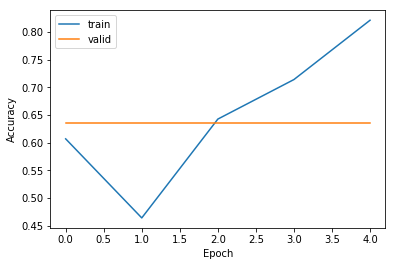

In [315]:
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='valid')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

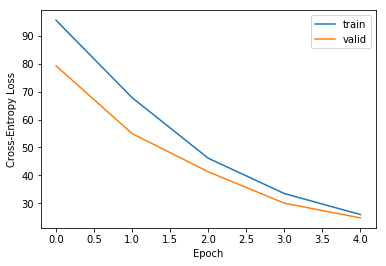

In [316]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.xlabel('Epoch')
plt.ylabel('Cross-Entropy Loss')
plt.legend()
plt.show()

# ResNet

In [330]:
X_train=XY_train
X_test=XY_test
Y2_train=YZ_train
Y2_test=YZ_test

X_train=np.transpose(X_train,(0,2,3,1))
X_test=np.transpose(X_test,(0,2,3,1))

Y2_train=np.transpose(Y2_train,(0,2,3,1))
Y2_test=np.transpose(Y2_test,(0,2,3,1))


We are reshaping input dimensions here. Not suitable for the CVN.

In [350]:
X1_train=np.transpose(X1_train,(0,2,3,1))
X1_test=np.transpose(X1_test,(0,2,3,1))

X2_train=np.transpose(X2_train,(0,2,3,1))
X2_test=np.transpose(X2_test,(0,2,3,1))

In [363]:
y_train.shape

(60245, 3)

In [353]:
def Unit(x,filters,pool=False):
    res = x
    if pool:
        x = MaxPooling2D(pool_size=(2, 2))(x)
        res = Conv2D(filters=filters,kernel_size=[1,1],strides=(2,2),padding="same")(res)
        
    out = BatchNormalization()(x)
    out = Activation("relu")(out)
    out = Conv2D(filters=filters, kernel_size=[3,3], strides=[1, 1], padding="same")(out)

    out = BatchNormalization()(out)
    out = Activation("relu")(out)
    out = Conv2D(filters=filters, kernel_size=[3, 3], strides=[1, 1], padding="same")(out)

    out = keras.layers.add([res,out])

    return out
def MiniModel(num_classes):
    #images = Input(shape=(1, 100,80), dtype='float32', name='images')
    images1 = Input(shape=(100,80,1), dtype='float32', name='images1')
    images2 = Input(shape=(100,80,1), dtype='float32', name='images2')
    
    net1 = Conv2D(filters=32, kernel_size=[3, 3], strides=[1, 1], padding="same")(images1)
    
    net1 = Unit(net1,32)
    #net1 = Unit(net1,32)
    #net1 = Unit(net1,32)

    net1 = Unit(net1,64,pool=True)
    #net1 = Unit(net1,64)
    #net1 = Unit(net1,64)
   
    
    net2 = Conv2D(filters=32, kernel_size=[3, 3], strides=[1, 1], padding="same")(images2)
    
    net2 = Unit(net2,32)
    #net2 = Unit(net2,32)
    #net2 = Unit(net2,32)

    net2 = Unit(net2,64,pool=True)
    #net2 = Unit(net2,64)
    #net2 = Unit(net2,64)
    

   # net = Unit(net,128,pool=True)
   # net = Unit(net,128)
   # net = Unit(net,128)

   # net = Unit(net, 256)
   # net = Unit(net, 256)
   # net = Unit(net, 256)




    
    net = concatenate([net1, net2])
    
    net = Unit(net,64,pool=True)
    net = Unit(net,64)
    #net = Unit(net,64)
       


    net = AveragePooling2D(pool_size=(2,2))(net)
    net = Flatten()(net)
    net = Dense(1024, activation='relu')(net)
    net = Dense(num_classes, activation='softmax', name='out')(net)
    model = Model(inputs=[images1, images2], outputs=net)

    #model = Model(inputs=images,outputs=net)

    return model

In [354]:
from keras.optimizers import SGD
from keras.utils import np_utils


model = MiniModel(3)
learning_rate = 0.02
decay_rate = 0.1
momentum = 0.9
opt = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['acc'])


In [ ]:
from keras.callbacks import TensorBoard

tb = TensorBoard(histogram_freq=0,
                 write_graph=True,
                 write_grads=False,
                 write_images=True)

history = model.fit([X1_train,X2_train], y_train, batch_size=50, epochs=5, verbose=1,
                    validation_data=([X1_test,X2_test], y_test), callbacks=[tb])

from keras.models import load_model

model.save('model_shallowResNet.h5')

# Classification Metrics

In [235]:
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

def classification_metrics(y_true, y_pred, y_prob):
    cm_dict = {}
    cm_dict['Accuracy'] = accuracy_score(y_true, y_pred)
    cm_dict['Precision'] =  precision_score(y_true, y_pred, average=None)
    cm_dict['Recall'] =  recall_score(y_true, y_pred, average=None)
    cm_dict['F1'] =  f1_score(y_true, y_pred, average=None) 
    #cm_dict['AUC'] = roc_auc_score(y_true, y_prob[:,0])
    cm_dict['Confusion Matrix'] = confusion_matrix(y_true, y_pred).tolist()
    return cm_dict

In [236]:
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """Plots a confusion matrix.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    New BSD License - see appendix
    """
    cm_max = cm.max()
    cm_min = cm.min()
    if cm_min > 0: cm_min = 0
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm_max = 1
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm_max / 2.
    plt.clim(cm_min, cm_max)

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i,
                 round(cm[i, j], 3),  # round to 3 decimals if they are float
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [338]:
from numpy import argmax

#y_probs = model.predict([XY_test,YZ_test])
y_probs = model.predict([X_test,Y2_test])
y_prob_max = np.argmax(y_probs, 1)
y_test_max = np.argmax(Y_test, 1)
cm_dict = classification_metrics(y_test_max, y_prob_max, y_probs)


print(y_probs)
print(y_prob_max)
print(y_test_max)

c:\users\user\appdata\local\programs\python\python35\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\user\appdata\local\programs\python\python35\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[[ 0.  0.  1.]
 [ 0.  0.  1.]
 [ 0.  0.  1.]
 [ 0.  0.  1.]
 [ 0.  0.  1.]
 [ 0.  0.  1.]
 [ 0.  0.  1.]
 [ 0.  0.  1.]
 [ 0.  0.  1.]
 [ 0.  0.  1.]
 [ 0.  0.  1.]]
[2 2 2 2 2 2 2 2 2 2 2]
[2 2 2 2 2 2 2 0 0 0 1]


In [216]:
for m in cm_dict:
    print(m, cm_dict[m])

F1 [ 0.          0.          0.77777778]
Accuracy 0.636363636364
Precision [ 0.          0.          0.63636364]
Confusion Matrix [[0, 0, 3], [0, 0, 1], [0, 0, 7]]
Recall [ 0.  0.  1.]


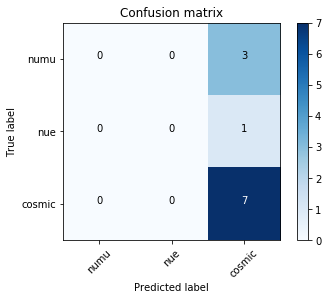

In [238]:
cm = np.asarray(cm_dict['Confusion Matrix'])
plot_confusion_matrix(cm, ['numu','nue','cosmic'], normalize=False)

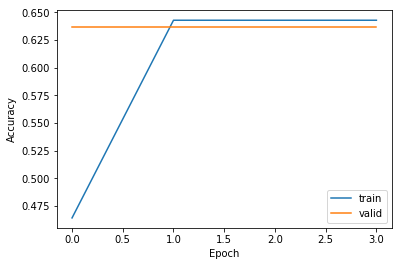

In [239]:
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='valid')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

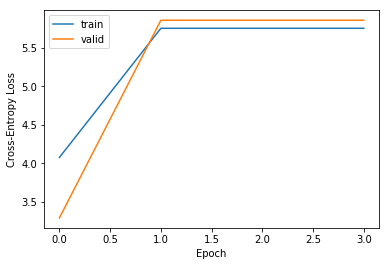

In [240]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.xlabel('Epoch')
plt.ylabel('Cross-Entropy Loss')
plt.legend()
plt.show()

In [294]:
i_tr= np.where(Y_train == 1)
i_ts= np.where(Y_test == 1)

In [323]:
Y_test

array([[ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.]])

In [324]:
Classifier_testing_0

array([[ 0.00196199,  0.00122139,  0.99681669],
       [ 0.00223964,  0.00139562,  0.99636477],
       [ 0.00225844,  0.00140532,  0.99633622]], dtype=float32)

In [302]:
Classifier_training_0 = model.predict([X_train[i_tr[1]==0],Y2_train[i_tr[1]==0]])
Classifier_testing_0 = model.predict([X_test[i_ts[1]==0],Y2_test[i_ts[1]==0]])

Classifier_training_1 = model.predict([X_train[i_tr[1]==1],Y2_train[i_tr[1]==1]])
Classifier_testing_1 = model.predict([X_test[i_ts[1]==1],Y2_test[i_ts[1]==1]])

Classifier_training_2 = model.predict([X_train[i_tr[1]==2],Y2_train[i_tr[1]==2]])
Classifier_testing_2 = model.predict([X_test[i_ts[1]==2],Y2_test[i_ts[1]==2]])

In [318]:
Classifier_training_0 = model.predict([XY_train[i_tr[1]==0],YZ_train[i_tr[1]==0]])
Classifier_testing_0 = model.predict([XY_test[i_ts[1]==0],YZ_test[i_ts[1]==0]])

Classifier_training_1 = model.predict([XY_train[i_tr[1]==1],YZ_train[i_tr[1]==1]])
Classifier_testing_1 = model.predict([XY_test[i_ts[1]==1],YZ_test[i_ts[1]==1]])

Classifier_training_2 = model.predict([XY_train[i_tr[1]==2],YZ_train[i_tr[1]==2]])
Classifier_testing_2 = model.predict([XY_test[i_ts[1]==2],YZ_test[i_ts[1]==2]])

In [319]:
c_max = 1
c_min = 0

Histo_training_0 = np.histogram(Classifier_training_0, bins=10, range=(c_min, c_max),density=True)
Histo_testing_0 = np.histogram(Classifier_testing_0,bins=10,range=(c_min,c_max),density=True)

Histo_training_1 = np.histogram(Classifier_training_1, bins=10, range=(c_min, c_max),density=True)
Histo_testing_1 = np.histogram(Classifier_testing_1,bins=10,range=(c_min,c_max),density=True)

Histo_training_2 = np.histogram(Classifier_training_2, bins=10, range=(c_min, c_max),density=True)
Histo_testing_2 = np.histogram(Classifier_testing_2,bins=10,range=(c_min,c_max),density=True)

In [320]:
AllHistos = [Histo_training_0, Histo_testing_0]
h_max = max([histo[0].max() for histo in AllHistos]) * 1.2
h_min = max([histo[0].min() for histo in AllHistos])

bin_edges = Histo_training_0[1]
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.
bin_widths = (bin_edges[1:] - bin_edges[:-1])

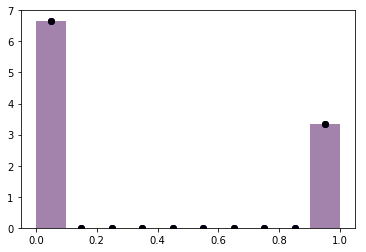

In [321]:
ax1 = plt.subplot(111)
ax1.bar(bin_centers, Histo_training_0[0], facecolor='red', linewidth=0, width=bin_widths,
        label='$\omega_b$ (Train)', alpha=0.2)

ax1.errorbar(bin_centers, Histo_testing_0[0],  xerr=None, ecolor='red', c='red', fmt='o',
             label='$\omega_s$ (Test)')

ax1.bar(bin_centers , Histo_training_1[0], facecolor='blue', linewidth=0, width=bin_widths,
        label='$\omega_b$ (Train)', alpha=0.2)

ax1.errorbar(bin_centers, Histo_testing_1[0],  xerr=None, ecolor='blue', c='blue', fmt='o',
             label='$\omega_s$ (Test)')

ax1.bar(bin_centers , Histo_training_2[0], facecolor='black', linewidth=0, width=bin_widths,
        label='$\omega_b$ (Train)', alpha=0.2)

ax1.errorbar(bin_centers, Histo_testing_2[0],  xerr=None, ecolor='black', c='black', fmt='o',
             label='$\omega_s$ (Test)')

plt.show()